In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx import edge_betweenness_centrality as betweenness

from dendrogram_handler_v2 import DendrogramHandler
from scipy.cluster.hierarchy import dendrogram # type: ignore
from typing import Literal

HeightMetric = Literal["distance", "max_cluster"]

def show_dendrogram(G: nx.Graph,
                    title: str = "Dendrogram",
                    height_metric: HeightMetric = "distance") -> None:
    plt.figure()
    myHandler: DendrogramHandler = DendrogramHandler(G, height_metric=height_metric)
    Z = myHandler.link_matrix       # Python style guides suggest direct access of public class variables
    ZLabels = myHandler.link_matrix_labels
    dendrogram(Z, labels=ZLabels)
    plt.title(title)
    plt.xlabel("Node")
    if height_metric == "max_cluster":
        plt.ylabel("Number of Nodes in Cluster")
    else:
        plt.ylabel("Distance")
    del myHandler

Found a graph with the desired edge betweenness ordering!
Generated 580 graphs


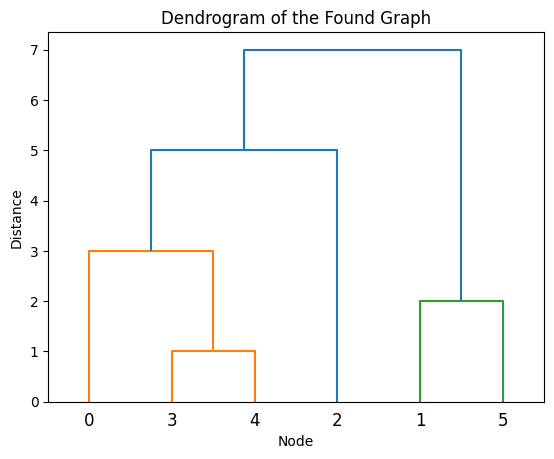

In [61]:
# We want to find a graph where it's edges are ordered by betweenness as (0,1) > (1,2) > (2,3) > (3,4)

G = nx.Graph()
G.add_nodes_from(range(6))
G.add_edges_from([
    (0, 1),
    (1, 2),
    (2, 3),
    (3, 4)
])

# So we have the base graph... now what? Can I brute force this?
# Breadth first search until we hit the ordering we want?

generated_graphs = set()
found_graph = None
queue = [G]
generated_graphs.add(frozenset(G.edges()))
while queue:
    current_graph = queue.pop(0)
    edge_scores = betweenness(current_graph)

    if edge_scores[(0, 1)] > edge_scores[(1, 2)] > edge_scores[(2, 3)] > edge_scores[(3, 4)]:
        print("Found a graph with the desired edge betweenness ordering!")
        show_dendrogram(current_graph, title="Dendrogram of the Found Graph")
        found_graph = current_graph
        break

    # New graph time...
    for u in current_graph.nodes():
        for v in current_graph.nodes():
            if u < v and not current_graph.has_edge(u, v) and frozenset(current_graph.edges() | {(u, v)}) not in generated_graphs:
                new_graph = current_graph.copy()
                new_graph.add_edge(u, v)
                queue.append(new_graph)
                generated_graphs.add(frozenset(new_graph.edges()))

print(f"Generated {len(generated_graphs)} graphs")

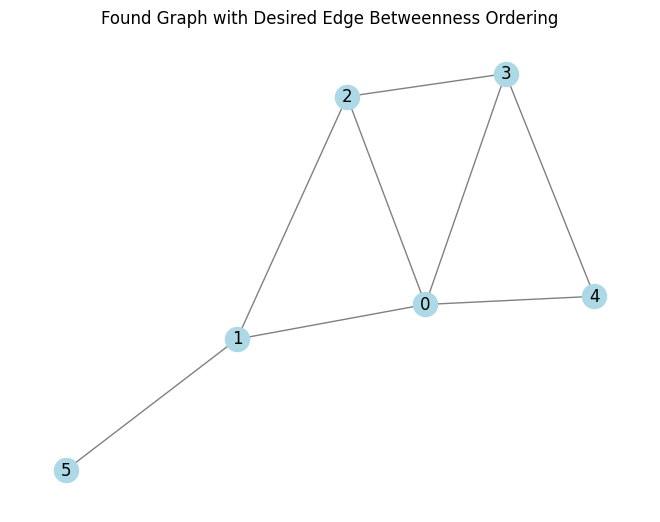

In [62]:
# Display the found graph
if found_graph:
    plt.figure()
    pos = nx.spring_layout(found_graph)
    nx.draw(found_graph, pos, with_labels=True, node_color='lightblue', edge_color='gray')
    plt.title("Found Graph with Desired Edge Betweenness Ordering")
    plt.show()

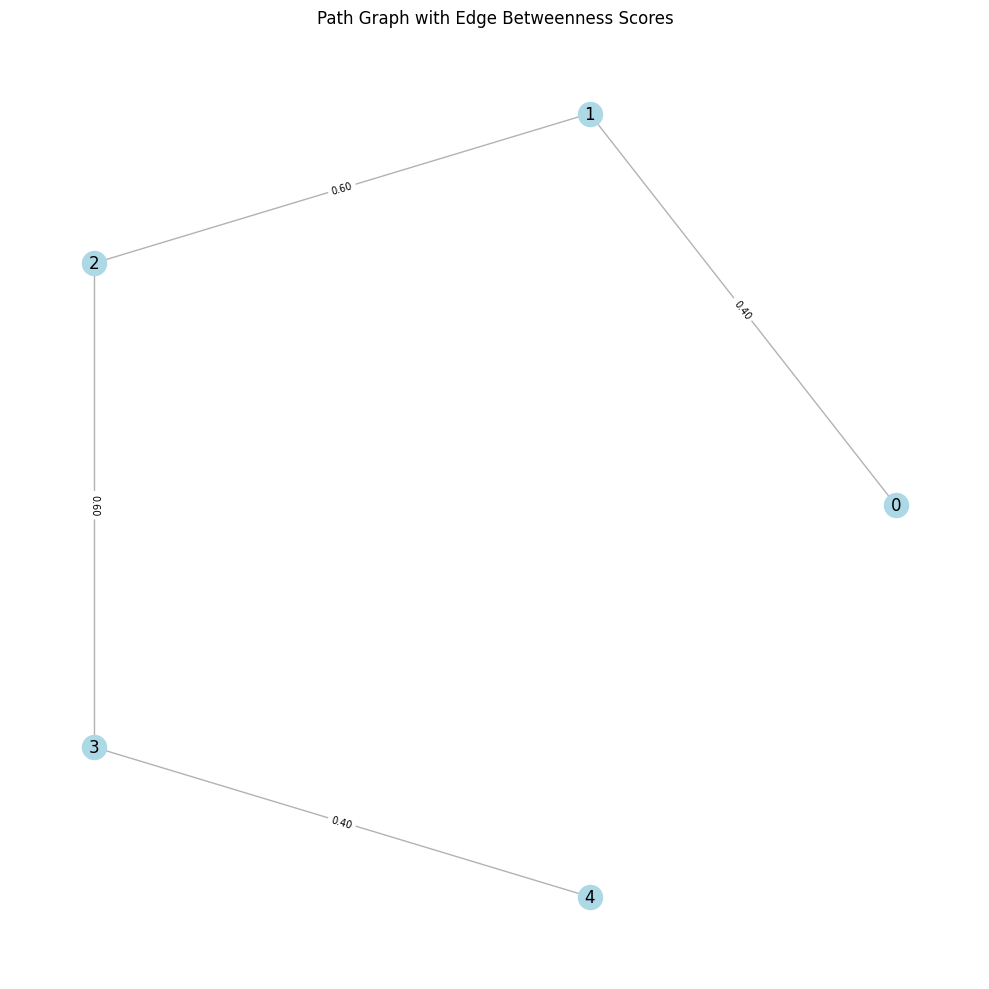

In [32]:
edge_scores = betweenness(G)
pos = nx.circular_layout(G)

# Create a figure and show the graph
fig, ax = plt.subplots(figsize=(10, 10))

# Draw the graph
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=300, ax=ax)
nx.draw_networkx_labels(G, pos, ax=ax)
nx.draw_networkx_edges(G, pos, ax=ax, alpha=0.3)

# Label edges with their betweenness scores (rounded to 2 decimal places)
edge_labels = {edge: f"{score:.2f}" for edge, score in edge_scores.items()}
nx.draw_networkx_edge_labels(G, pos, edge_labels, ax=ax, font_size=7)

ax.set_title("Path Graph with Edge Betweenness Scores")
ax.axis('off')
plt.tight_layout()
plt.show()


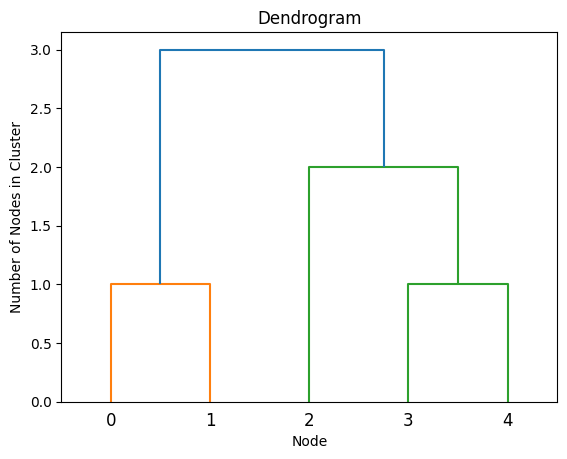

In [33]:
show_dendrogram(G, height_metric="max_cluster") 